In [1]:
# https://randlow.github.io/posts/finance-economics/pandas-datareader-KF/
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.dates as mdates
import statsmodels.api as sm
import scipy as sp
from dateutil.relativedelta import relativedelta
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
s_date = "1969-01-01"
e_date = "2023-12-31"
_dir = os.path.realpath(".")

DatatoRead = "F-F_Research_Data_Factors"
ds_factors = web.DataReader(DatatoRead, "famafrench", start=s_date, end=e_date)

print(f"Keys: {ds_factors.keys()}")
print(f"Dataset Description: {ds_factors['DESCR']}")

Keys: dict_keys([0, 1, 'DESCR'])
Dataset Description: F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202312 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2023 Kenneth R. French

  0 : (660 rows x 4 cols)
  1 : Annual Factors: January-December (55 rows x 4 cols)


C:\Users\eorlo\AppData\Local\Temp\ipykernel_3936\2869083309.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ds_factors = web.DataReader(DatatoRead, "famafrench", start=s_date, end=e_date)
C:\Users\eorlo\AppData\Local\Temp\ipykernel_3936\2869083309.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ds_factors = web.DataReader(DatatoRead, "famafrench", start=s_date, end=e_date)


In [3]:
df_factors = ds_factors[1].copy()
df_factors.reset_index(inplace=True)
df_factors

# print(ds_factors[1])


,Date,Mkt-RF,SMB,HML,RF
0,1969,-17.54,-13.99,-10.05,6.58
1,1970,-6.49,-11.87,21.52,6.52
2,1971,11.78,5.98,-11.30,4.39
3,1972,13.05,-12.16,1.80,3.84
4,1973,-26.18,-23.51,17.47,6.93
5,1974,-35.75,-0.81,9.96,8.00
6,1975,32.44,15.41,9.14,5.80
7,1976,21.91,14.67,24.38,5.08
8,1977,-8.26,22.62,7.46,5.12
9,1978,1.03,14.42,0.67,7.18


In [4]:
df_factors = df_factors.set_index(["Date"])

try:
    df_factors.index = df_factors.index.to_timestamp()
except:
    pass


In [5]:
# df_factors_tmp = df_factors['Date'].dt.to_timestamp(freq = 'M').dt.strftime('%Y-%m')
# df_factors_tmp.index = pd.to_datetime(df_factors_tmp.index)
# print(df_factors_tmp)


In [6]:
RF = df_factors["RF"]
df_factors.head()


,Mkt-RF,SMB,HML,RF
Date,,,,
1969-01-01,-17.54,-13.99,-10.05,6.58
1970-01-01,-6.49,-11.87,21.52,6.52
1971-01-01,11.78,5.98,-11.30,4.39
1972-01-01,13.05,-12.16,1.80,3.84
1973-01-01,-26.18,-23.51,17.47,6.93


0 ACF
1 PACF


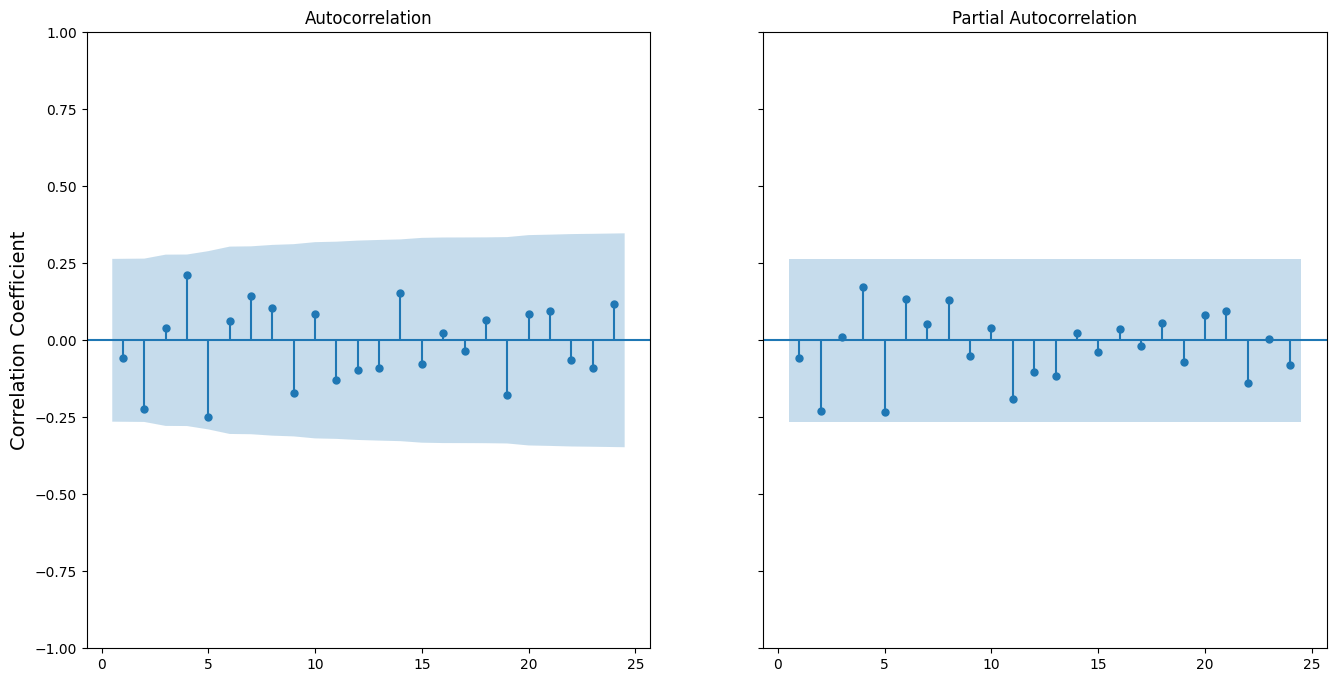

In [7]:
series = df_factors["Mkt-RF"]
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

# colormap = plt.cm.get_cmap("twilight")
colormap = mpl.colormaps["twilight"]
colors = [colormap(i) for i in np.linspace(0.3, 0.5, 5)]

for i, k in enumerate(["ACF", "PACF"]):
    print(i, k)
    if i == 0:
        axes[i].set_ylabel("Correlation Coefficient", fontsize=14)
        plot_acf(series, lags=24, zero=False, ax=axes[i])
    else:
        plot_pacf(series, lags=24, zero=False, ax=axes[i])

plt.savefig("ACF")
plt.show()


In [8]:
def ACF_test(dftest, n_split=3):
    test = np.array_split(dftest, n_split)
    test.insert(0, dftest)
    test_result = {}
    for t, series in enumerate(test):
        start_date = series.index[0].date().strftime('%Y/%m/%d')
        end_date = series.index[-1].date().strftime('%Y/%m/%d')
        sample_range = start_date + '-' + end_date
        sample_num = len(series.index)
        sample_mean = np.round(series.mean(), 3)
        sample_SD = np.round(series.std(), 3)
        sample_coef = np.round(sm.tsa.acf(series, nlags=4) * 100, 1)
        sample_coef = sample_coef[1:]
        sample_LB5 = np.round(
            sm.stats.acorr_ljungbox(series, lags=[4])[0][0], 1)
        sample_LB10 = np.round(
            sm.stats.acorr_ljungbox(series, lags=[8])[0][0], 1)
        if t == 0:
            test_result['Sample Period'] = [sample_range]
            test_result['Sample Size'] = [sample_num]
            test_result['Mean'] = [sample_mean]
            test_result['SD'] = [sample_SD]
            for i in range(len(sample_coef)):
                test_result['\hat\rho_{}'.format(str(i +
                                                     1))] = [sample_coef[i]]
            test_result['\hat Q_5'] = [sample_LB5]
            test_result['\hat Q_10'] = [sample_LB10]
        else:
            test_result['Sample Period'].append(sample_range)
            test_result['Sample Size'].append(sample_num)
            test_result['Mean'].append(sample_mean)
            test_result['SD'].append(sample_SD)
            for i in range(len(sample_coef)):
                test_result['\hat\rho_{}'.format(str(i + 1))].append(
                    sample_coef[i])
            test_result['\hat Q_5'].append(sample_LB5)
            test_result['\hat Q_10'].append(sample_LB10)
    test_result = pd.DataFrame.from_dict(test_result)
    return test_result

In [10]:
out = ACF_test(df_factors["Mkt-RF"])
print(out)


c:\Users\eorlo\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


KeyError: 0